In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn import datasets
import torch.nn as nn

In [0]:
torch.manual_seed(1)
n_pts = 500
X,y = datasets.make_circles(n_samples=n_pts,noise=0.2,factor=0.2,random_state=123)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [0]:
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

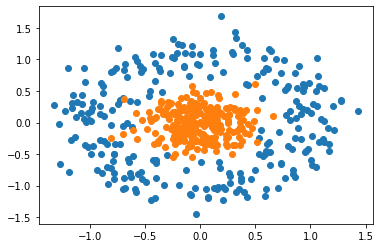

In [0]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self,input_size,H1,output_size):
    super().__init__()
    self.linear = nn.Linear(input_size,H1)
    self.linear2 = nn.Linear(H1,output_size)
  def forward(self,x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

In [0]:
torch.manual_seed(2)
model=Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
Loss = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)

In [0]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)  ## x data as an input and then feed forwarded to get an output y
  loss = Loss(y_pred, y_data)  ## difference between the actual and the predicted
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()  ##sets the initial gradient to zero
  loss.backward()   ## The whole calculated loss is then back propogated to the model
  optimizer.step()  ## Then the weights are updated by doing their derivative w.r.t the Loss

epoch: 0 loss: 0.714772641658783
epoch: 1 loss: 0.6946446895599365
epoch: 2 loss: 0.6954411268234253
epoch: 3 loss: 0.7013660073280334
epoch: 4 loss: 0.7012292742729187
epoch: 5 loss: 0.697297990322113
epoch: 6 loss: 0.6937738656997681
epoch: 7 loss: 0.6927266120910645
epoch: 8 loss: 0.6938118934631348
epoch: 9 loss: 0.6952953338623047
epoch: 10 loss: 0.6956841945648193
epoch: 11 loss: 0.6946614980697632
epoch: 12 loss: 0.692838728427887
epoch: 13 loss: 0.691053569316864
epoch: 14 loss: 0.6898247003555298
epoch: 15 loss: 0.6891287565231323
epoch: 16 loss: 0.6885120272636414
epoch: 17 loss: 0.6874342560768127
epoch: 18 loss: 0.6855922341346741
epoch: 19 loss: 0.6830151081085205
epoch: 20 loss: 0.679951012134552
epoch: 21 loss: 0.6766775250434875
epoch: 22 loss: 0.673354983329773
epoch: 23 loss: 0.6699721217155457
epoch: 24 loss: 0.6663872599601746
epoch: 25 loss: 0.662428081035614
epoch: 26 loss: 0.6579880118370056
epoch: 27 loss: 0.6530686020851135
epoch: 28 loss: 0.6477518677711487
ep

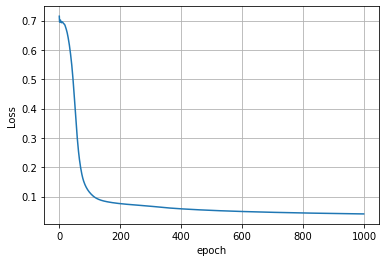

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

To test our model. We first make a counter zone. 

In [0]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

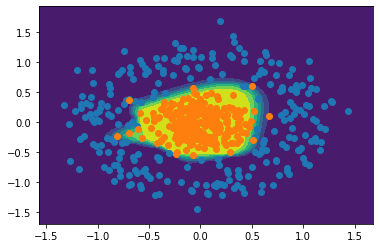

In [0]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


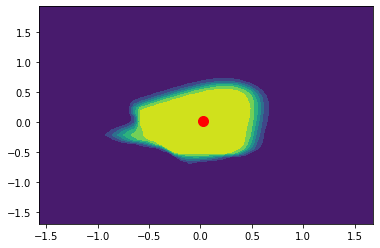

In [0]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(X, y)

In [0]:
### Thus our model is accuretly predicting a new point